In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import glob
from radioReduction import *
from astropy.stats import LombScargle
from scipy import optimize
from scipy.interpolate import make_interp_spline, BSpline
import glob

In [15]:
mjd = []
flux = []
err = []

files = glob.glob('1314/daily/*-LLRR.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

dt = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
dt = dt.sort_values('mjd')

In [16]:
dt.to_csv('1314/daily/daily_1314.csv')

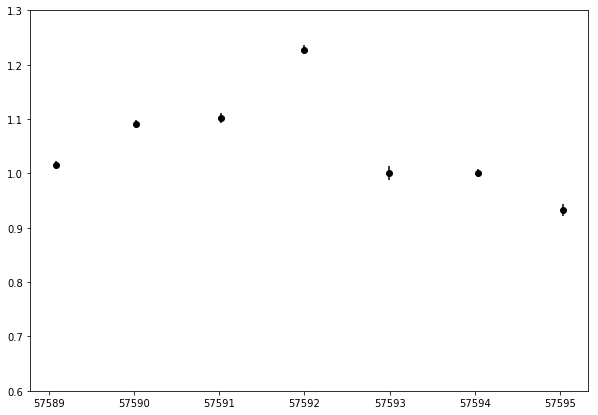

In [17]:
plt.figure(figsize=(10,7))
plt.errorbar(dt['mjd'],dt['re'],yerr=dt['ure'],color='k',fmt='o')
plt.ylim(.6,1.3)
plt.show()

In [18]:
dt

,mjd,re,ure
2,57589.079052,1.015481,0.007672
0,57590.023889,1.090625,0.007376
1,57591.022223,1.102394,0.009150
6,57591.992813,1.227345,0.008060
4,57592.993497,1.000782,0.012601
5,57594.032138,1.000526,0.007945
3,57595.031702,0.932301,0.010495
